In [1]:
## Data Preprocessing
import pandas as pd
import numpy as np

## Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Modeling
from sklearn.svm import SVR, LinearSVR
from sklearn.decomposition import PCA
# from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from sklearn import tree
from sklearn import ensemble
from sklearn.model_selection import train_test_split, \
                                    cross_val_score, \
                                    GridSearchCV
from sklearn.preprocessing import label_binarize, StandardScaler


## Find out execution time
from datetime import datetime

## Suppress warnings
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline
plt.style.use('seaborn-white')

In [2]:
df = pd.read_csv('input/reg_A.csv')
print('Dataframe shape: ', df.shape)
df.head()

Dataframe shape:  (1000, 13)


,A,B,C,F,G,H,I,J,K,L,M,N,Response
0,-139.183051,-1.060948,-0.097275,-0.365750,0.404934,-0.305241,-1.404708,0.337155,-1.592293,-0.103458,-0.205713,-138.988001,-0.456757
1,29.485760,0.505301,2.554449,-1.150606,-1.136165,1.057958,0.605221,1.175852,-0.746916,1.747668,1.892266,29.152263,1.396062
2,-58.997366,0.345515,0.975520,-1.028006,-1.021109,0.281955,0.845064,-0.204924,-0.737706,0.852126,1.080193,-58.942485,1.612660
3,-337.510287,-0.535584,0.276812,0.547569,-0.625828,0.779547,-0.193539,-1.696172,-1.226760,-0.876860,-1.143868,-337.379225,-0.498703
4,-170.224848,1.288707,-0.454460,-0.638863,-1.486823,-0.525961,0.147493,-0.923201,-0.929357,-1.304802,-1.611586,-169.823726,1.186234


In [3]:
# df.drop('Unnamed: 0', axis=1, inplace=True)

In [4]:
# print('Dataframe shape: ', df.shape)
# df.head()

# PCA

In [5]:
X = df.drop(columns=['Response'])
Y = df[['Response']]

X = StandardScaler().fit_transform(X)


pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)

X = pd.DataFrame(data = principalComponents
             , columns = ['pc_1', 'pc_2'])

X.head(5)

,pc_1,pc_2
0,1.355054,0.228905
1,-0.039376,-2.529229
2,1.010528,-1.390654
3,3.515020,1.536946
4,1.972209,2.077522


In [6]:
pca.explained_variance_ratio_

array([0.22717755, 0.16613805])

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size = 0.3)

# SVM

In [8]:
def plot_svc(svc, X, y, h=0.02, pad=0.25):
    '''
    Define a function to plot a classifier with support vectors.
    Parameters
    ----------
    svc : sklearn.svm.classes.SVC
        Pretrained support vector classifier
    X : dataframe
        Pandas data
    y : series or list
        Labels
    h : float
    pad : float
    Returns
    ----------
    None : Just plot the graph
    '''
    
    x_min, x_max = X.iloc[:, 0].min()-pad, X.iloc[:, 0].max()+pad
    y_min, y_max = X.iloc[:, 1].min()-pad, X.iloc[:, 1].max()+pad
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.2)

    plt.scatter(X.iloc[:,0], X.iloc[:,1], s=70, c=y, cmap=plt.cm.Paired)
    # Support vectors indicated in plot by vertical lines
    sv = svc.support_vectors_
    plt.scatter(sv[:,0], sv[:,1], c='k', marker='|', s=100, linewidths='1')
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.show()
    print('Number of support vectors: ', svc.support_.size)

In [9]:
startTime = datetime.now()

tuned_parameters = [{
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly']
}]

# As we know default value of degree = 3 for polynomeal kernel,
# so we don't need to mention that
clf = GridSearchCV(SVR(), tuned_parameters)
clf.fit(X_train, y_train)

print(clf.best_params_)

print('Best parameter finding time: ', datetime.now() - startTime)

{'kernel': 'linear', 'C': 1}
Best parameter finding time:  0:00:02.215327


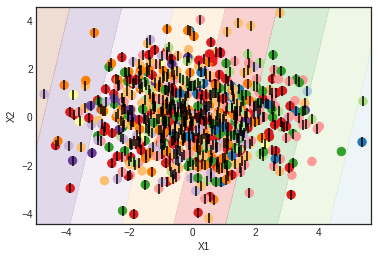

Number of support vectors:  635


In [10]:
# Support Vector Classifier with linear kernel.
svc = SVR(C= 1, kernel='linear')
svc.fit(X_train, y_train)

plot_svc(svc, X_train, y_train['Response'])

# Without PCA

In [12]:
X = df.drop(columns=['Response'])
Y = df[['Response']]
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size = 0.3)

In [13]:
startTime = datetime.now()

# As we know default value of degree = 3 for polynomeal kernel,
# so we don't need to mention that
tuned_parameters = [{
    # I have commented the following code because it takes a lot of time for training
    # 'C': [0.1, 1, 10], 
    'kernel': ['linear', 'rbf', 'poly']
}]

clf = GridSearchCV(SVR(), tuned_parameters)
clf.fit(X_train, y_train)

print(clf.best_params_)

print('Best parameter finding time: ', datetime.now() - startTime)

{'kernel': 'linear'}
Best parameter finding time:  0:05:58.400764


In [14]:
svc = SVR(kernel='linear')
svc.fit(X_train, y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [25]:
svc.score(X_test, y_test)

0.3742630258646378

In [26]:
def f_importances(coef, names):
    imp = coef
    imp,names = zip(*sorted(zip(imp,names)))
    plt.barh(range(len(names)), imp, align='center')
    plt.yticks(range(len(names)), names)
    plt.show()

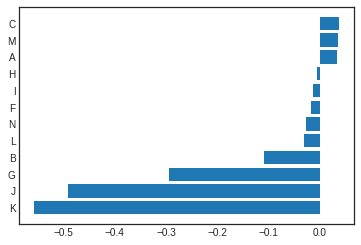

In [27]:
features_names = X_train.columns.values
f_importances(svc.coef_[0], features_names)